In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/in-vehicle-coupon-recommendation.csv")

In [4]:
df.drop(columns=["car"], inplace=True, errors="ignore")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [6]:
print(df.isnull().sum())

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [7]:
# CATEGORICAL COLUMNS
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)
for col in categorical_columns:                    # UNIQUE VALUES FOR EACH CATEGORICAL COLUMNS
    print(f"{col}: {df[col].nunique()}")


Categorical Columns: Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')
destination: 3
passanger: 4
weather: 3
time: 5
coupon: 5
expiration: 2
gender: 2
age: 8
maritalStatus: 5
education: 6
occupation: 25
income: 9
Bar: 5
CoffeeHouse: 5
CarryAway: 5
RestaurantLessThan20: 5
Restaurant20To50: 5


In [13]:
# CATEGORICAL AND NUMERICAL FEATURES
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

print("Categorical Features:", categorical_cols)
print("Numerical Features:", numerical_cols)

Categorical Features: Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')
Numerical Features: Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')


In [15]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [16]:
# MODE IMPUTATION (FILLING MISSING VALUES WITH MODE)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-16-4a90dbf08db6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [9]:
# BAR PLOT TO  FIND IMBALANCE IN TARGET VARIABLE

<ipython-input-29-2d7da5b0bc97>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Y", data=df, palette="Set2")


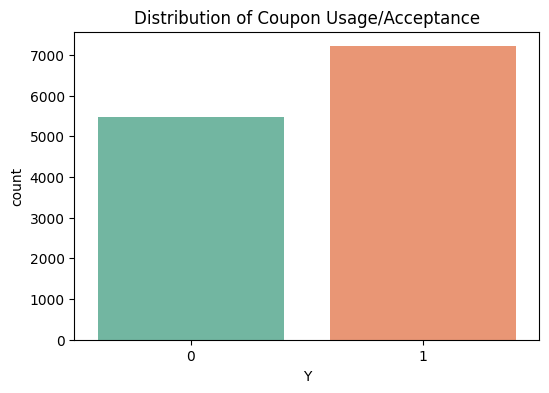

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Y", data=df, palette="Set2")
plt.title("Distribution of Coupon Usage/Acceptance")
plt.show()

In [19]:
# USING BOXPLOT TO ANALYSE WHETHER HIGHER INCOME INDIVIDUALS ARE MORE LIKELY TO USE COUPONS

<ipython-input-31-67ad7d91ca91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Y", y="income", data=df, palette="coolwarm")


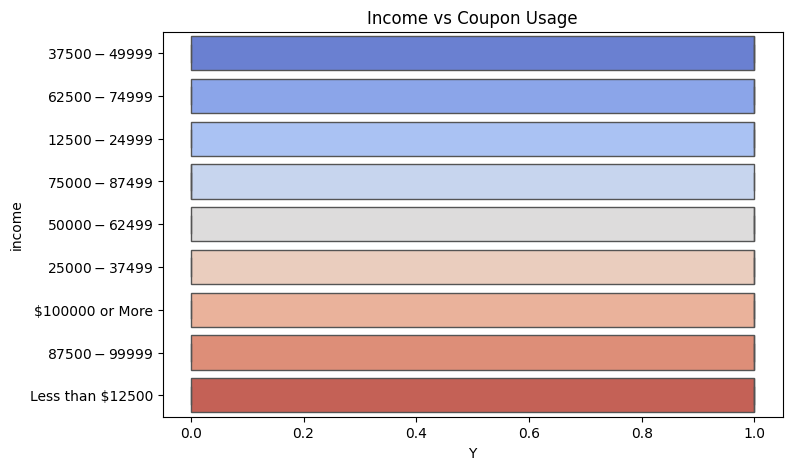

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Y", y="income", data=df, palette="coolwarm")
plt.title("Income vs Coupon Usage")
plt.show()


<ipython-input-30-d88dce410ff5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Y"], y=df["temperature"], palette="coolwarm")


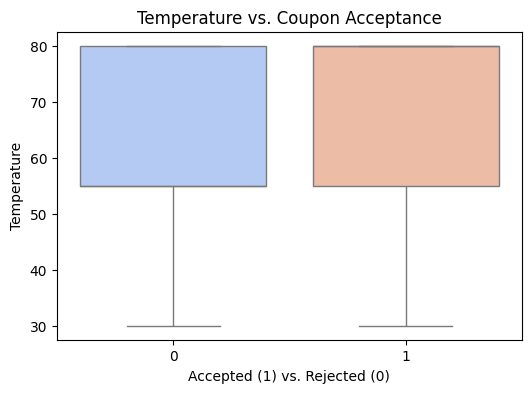

In [30]:
# BOXPLOT AGAIN FOR TEMPERATURE VS COUPON ACCEPTANCE
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Y"], y=df["temperature"], palette="coolwarm")
plt.title("Temperature vs. Coupon Acceptance")
plt.xlabel("Accepted (1) vs. Rejected (0)")
plt.ylabel("Temperature")
plt.show()

In [20]:
# VIOLIN PLOT; COMPARING DISTRIBUTION OF AGE GROUPS

<ipython-input-21-e638679df63f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Y", y="age", data=df, palette="muted")


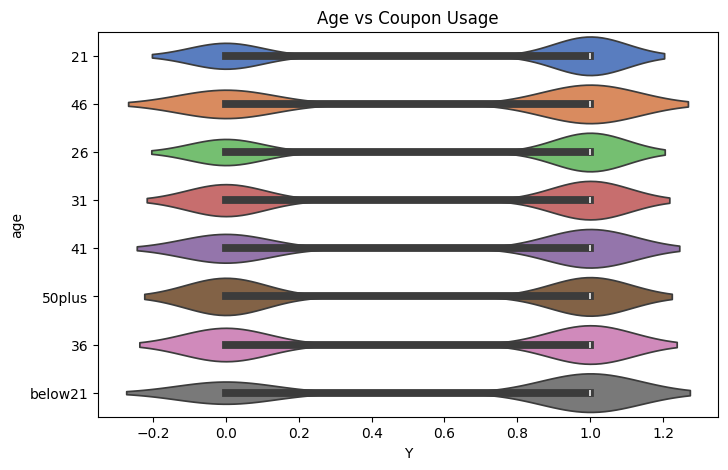

In [21]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Y", y="age", data=df, palette="muted")
plt.title("Age vs Coupon Usage")
plt.show()

In [32]:
# VIOLIN PLOT AGAIN FOR DESTINATION VS COUPN ACCEPTANCE

<ipython-input-34-0b42b40aad76>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["destination"], y=df["Y"], palette="muted")


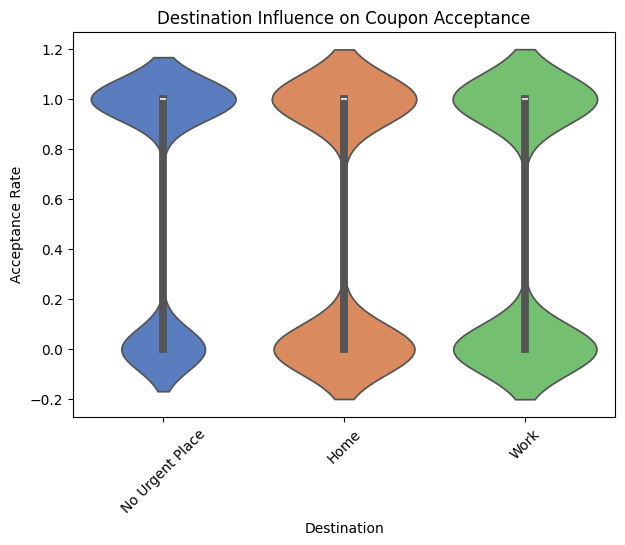

In [34]:
plt.figure(figsize=(7, 5))
sns.violinplot(x=df["destination"], y=df["Y"], palette="muted")
plt.xticks(rotation=45)
plt.title("Destination Influence on Coupon Acceptance")
plt.xlabel("Destination")
plt.ylabel("Acceptance Rate")
plt.show()

In [24]:
print(df.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


In [25]:
#COUNT PLOT: CHECKING WHETHER TIME HAS ANY INFLUENCE IN COUPON ACCEPTANCE

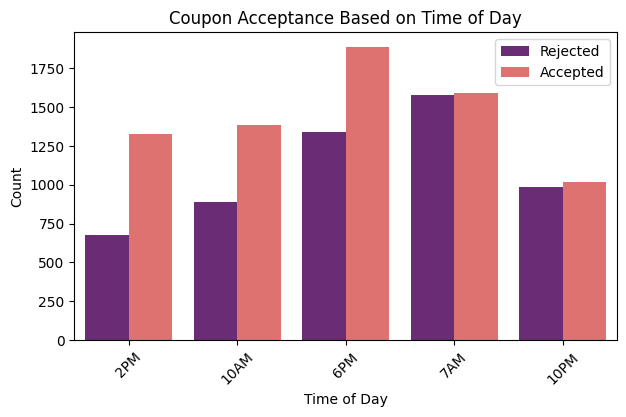

In [26]:
plt.figure(figsize=(7, 4))
sns.countplot(x=df["time"], hue=df["Y"], palette="magma")
plt.title("Coupon Acceptance Based on Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.legend(["Rejected", "Accepted"])
plt.xticks(rotation=45)
plt.show()

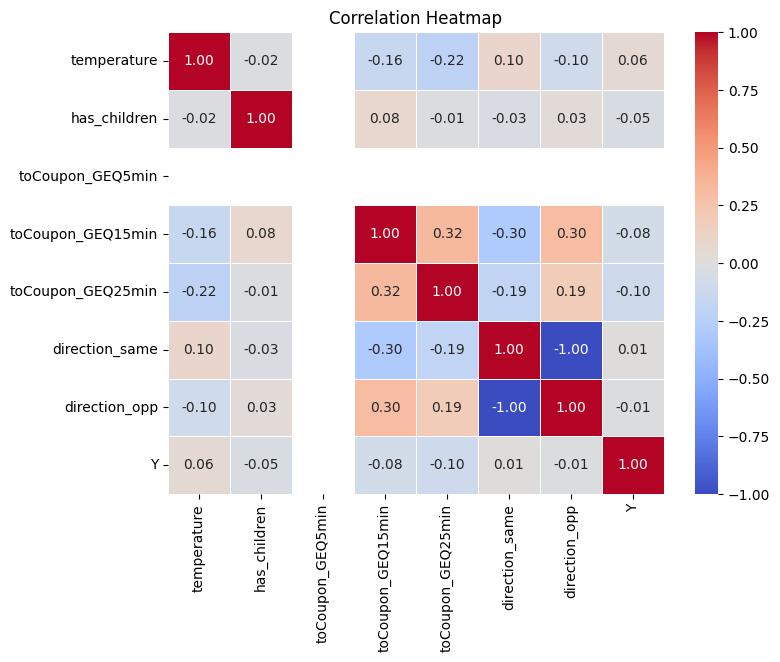

In [28]:
# HEATMAP FOR CORRELATION BETWEEN NUMERICAL COLUMNS
plt.figure(figsize=(8, 6))
#only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()